In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
names = ['class','sha256']
for i in range(1,106):
    names.append(f'api_{i}')

In [33]:
df = pd.read_csv('./malware_dataset/malware_API_dataset.csv',on_bad_lines='skip',names=names)
df

,class,sha256,api_1,api_2,api_3,api_4,api_5,api_6,api_7,api_8,...,api_96,api_97,api_98,api_99,api_100,api_101,api_102,api_103,api_104,api_105
0,Worm.Win32.Zwr.c,009a83236c600fd7ac034973f064284cec62f86631fe96...,GetSystemDirectoryA,IsDBCSLeadByte,LocalAlloc,CreateSemaphoreW,CreateSemaphoreA,GlobalAddAtomW,lstrcpynW,LoadLibraryExW,...,LoadLibraryExW,DuplicateHandle,DeviceIoControl,SwitchToThread,WSACleanup,FreeLibrary,VirtualQueryEx,ResetEvent,VirtualFreeEx,UnregisterClassW
1,Worm.Win32.Zwr.c,191828200aa2bd78f3548fb6a47407b05905efee6e83e0...,GetSystemDirectoryA,IsDBCSLeadByte,LocalAlloc,CreateSemaphoreW,CreateSemaphoreA,GlobalAddAtomW,lstrcpynW,LoadLibraryExW,...,LoadLibraryExW,DuplicateHandle,DeviceIoControl,SwitchToThread,WSACleanup,FreeLibrary,VirtualQueryEx,ResetEvent,VirtualFreeEx,UnregisterClassW
2,Worm.Win32.Zwr.c,1a1937fe8a401ca27be4514acc4f811442d8201abbad2a...,GetSystemDirectoryA,IsDBCSLeadByte,LocalAlloc,CreateSemaphoreW,CreateSemaphoreA,GlobalAddAtomW,lstrcpynW,LoadLibraryExW,...,LoadLibraryExW,DuplicateHandle,DeviceIoControl,SwitchToThread,WSACleanup,FreeLibrary,VirtualQueryEx,ResetEvent,VirtualFreeEx,UnregisterClassW
3,Worm.Win32.Zwr.c,21bbf357ac6d8347c68ec65fb8283a5f1185f699186959...,GetSystemDirectoryA,IsDBCSLeadByte,LocalAlloc,CreateSemaphoreW,CreateSemaphoreA,GlobalAddAtomW,lstrcpynW,LoadLibraryExW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Worm.Win32.Zwr.c,39563933eebcb3b09b189000e1bda255b39739792fc136...,GetSystemDirectoryA,IsDBCSLeadByte,LocalAlloc,CreateSemaphoreW,CreateSemaphoreA,GlobalAddAtomW,lstrcpynW,LoadLibraryExW,...,LoadLibraryExW,DuplicateHandle,DeviceIoControl,SwitchToThread,WSACleanup,FreeLibrary,VirtualQueryEx,ResetEvent,VirtualFreeEx,UnregisterClassW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,Trojan-Spy.Win32.Zbot.jtme,1fa088e4bfce3a269cd69fad5dc632fa977e6741a73f04...,GlobalFindAtomW,GetModuleHandleW,DisableThreadLibraryCalls,GetVersionExW,GetVersionExA,GetModuleHandleA,GetProcAddress,CoTaskMemAlloc,...,GetProcAddress,GetWindowThreadProcessId,GetCurrentProcessId,LocalFree,CloseHandle,CoTaskMemFree,NaN,NaN,NaN,NaN
1590,HEUR:Worm.Win32.Generic,1fad69fad4aac201134b9600e1596d327097c38046e2ff...,GetSystemDirectoryA,GetVersionExW,IsDBCSLeadByte,CompareStringW,DisableThreadLibraryCalls,CreateEventW,lstrcpyW,GetThreadLocale,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1591,Virus.Win32.Sality.l,1fb2ce95769c2372560f34b00398f3681949f494bfdf1c...,DisableThreadLibraryCalls,GetVersionExW,GetVersionExA,GetModuleHandleW,GetModuleHandleA,GetProcAddress,LocalAlloc,lstrlenW,...,VirtualQueryEx,GetModuleFileNameW,WriteFile,UnregisterClassW,GetModuleHandleW,GetProcAddress,GetWindowThreadProcessId,GetCurrentProcessId,LocalFree,CloseHandle
1592,HEUR:Trojan.Win32.Generic,1fb8e85deb472dadf965916020ac9ccec0104d882eb332...,VirtualAllocEx,GetStartupInfoA,GetStdHandle,GetFileType,LockResource,GetCommandLineA,GetEnvironmentStringsW,FreeEnvironmentStringsW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594 entries, 0 to 1593
Columns: 107 entries, class to api_105
dtypes: object(107)
memory usage: 1.3+ MB


In [35]:
df.describe()

,class,sha256,api_1,api_2,api_3,api_4,api_5,api_6,api_7,api_8,...,api_96,api_97,api_98,api_99,api_100,api_101,api_102,api_103,api_104,api_105
count,1466,1594,1594,1594,1594,1594,1594,1594,1594,1594,...,454,391,346,305,259,216,178,151,117,84
unique,615,1594,65,72,77,92,97,113,113,112,...,113,110,101,89,85,69,66,50,37,27
top,HEUR:Trojan.Win32.Generic,009a83236c600fd7ac034973f064284cec62f86631fe96...,GetSystemDirectoryA,IsDBCSLeadByte,LocalAlloc,CreateSemaphoreW,CreateSemaphoreA,GlobalAddAtomW,lstrcpynW,LoadLibraryExW,...,CloseHandle,GetPrivateProfileStringA,GetPrivateProfileIntA,LocalFree,WSACleanup,FreeLibrary,VirtualQueryEx,ResetEvent,VirtualFreeEx,UnregisterClassW
freq,300,1,287,221,230,225,229,222,226,228,...,35,20,19,21,17,20,18,17,19,18


In [36]:
for i,item in enumerate(df['class']):
    if isinstance(item,str):
        df['class'][i] = item.split('.')[0]
df['class'][0]

/var/folders/g3/862qhf7101n47zwcvz2r7f6m0000gn/T/ipykernel_83602/4086576401.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['class'][i] = item.split('.')[0]


'Worm'

In [37]:
df['class']

0              Worm
1              Worm
2              Worm
3              Worm
4              Worm
           ...     
1589     Trojan-Spy
1590      HEUR:Worm
1591          Virus
1592    HEUR:Trojan
1593     Trojan-Spy
Name: class, Length: 1594, dtype: object

In [38]:
classes = ['trojan','worm','packed','virus','backdoor','hoax','usd','not-a-virus','hacktool','rootkit']
for i,mal_class in enumerate(df['class']):
    if isinstance(mal_class,str):
        mal_class = mal_class.lower()
        for word in classes:
            if word in mal_class:
                if word == 'not-a-virus':
                    df['class'][i] = 'adware'
                elif word == 'usd':
                    df['class'][i] = 'USD'
                else:
                    df['class'][i] = word
                break
df
        


,class,sha256,api_1,api_2,api_3,api_4,api_5,api_6,api_7,api_8,...,api_96,api_97,api_98,api_99,api_100,api_101,api_102,api_103,api_104,api_105
0,worm,009a83236c600fd7ac034973f064284cec62f86631fe96...,GetSystemDirectoryA,IsDBCSLeadByte,LocalAlloc,CreateSemaphoreW,CreateSemaphoreA,GlobalAddAtomW,lstrcpynW,LoadLibraryExW,...,LoadLibraryExW,DuplicateHandle,DeviceIoControl,SwitchToThread,WSACleanup,FreeLibrary,VirtualQueryEx,ResetEvent,VirtualFreeEx,UnregisterClassW
1,worm,191828200aa2bd78f3548fb6a47407b05905efee6e83e0...,GetSystemDirectoryA,IsDBCSLeadByte,LocalAlloc,CreateSemaphoreW,CreateSemaphoreA,GlobalAddAtomW,lstrcpynW,LoadLibraryExW,...,LoadLibraryExW,DuplicateHandle,DeviceIoControl,SwitchToThread,WSACleanup,FreeLibrary,VirtualQueryEx,ResetEvent,VirtualFreeEx,UnregisterClassW
2,worm,1a1937fe8a401ca27be4514acc4f811442d8201abbad2a...,GetSystemDirectoryA,IsDBCSLeadByte,LocalAlloc,CreateSemaphoreW,CreateSemaphoreA,GlobalAddAtomW,lstrcpynW,LoadLibraryExW,...,LoadLibraryExW,DuplicateHandle,DeviceIoControl,SwitchToThread,WSACleanup,FreeLibrary,VirtualQueryEx,ResetEvent,VirtualFreeEx,UnregisterClassW
3,worm,21bbf357ac6d8347c68ec65fb8283a5f1185f699186959...,GetSystemDirectoryA,IsDBCSLeadByte,LocalAlloc,CreateSemaphoreW,CreateSemaphoreA,GlobalAddAtomW,lstrcpynW,LoadLibraryExW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,worm,39563933eebcb3b09b189000e1bda255b39739792fc136...,GetSystemDirectoryA,IsDBCSLeadByte,LocalAlloc,CreateSemaphoreW,CreateSemaphoreA,GlobalAddAtomW,lstrcpynW,LoadLibraryExW,...,LoadLibraryExW,DuplicateHandle,DeviceIoControl,SwitchToThread,WSACleanup,FreeLibrary,VirtualQueryEx,ResetEvent,VirtualFreeEx,UnregisterClassW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,trojan,1fa088e4bfce3a269cd69fad5dc632fa977e6741a73f04...,GlobalFindAtomW,GetModuleHandleW,DisableThreadLibraryCalls,GetVersionExW,GetVersionExA,GetModuleHandleA,GetProcAddress,CoTaskMemAlloc,...,GetProcAddress,GetWindowThreadProcessId,GetCurrentProcessId,LocalFree,CloseHandle,CoTaskMemFree,NaN,NaN,NaN,NaN
1590,worm,1fad69fad4aac201134b9600e1596d327097c38046e2ff...,GetSystemDirectoryA,GetVersionExW,IsDBCSLeadByte,CompareStringW,DisableThreadLibraryCalls,CreateEventW,lstrcpyW,GetThreadLocale,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1591,virus,1fb2ce95769c2372560f34b00398f3681949f494bfdf1c...,DisableThreadLibraryCalls,GetVersionExW,GetVersionExA,GetModuleHandleW,GetModuleHandleA,GetProcAddress,LocalAlloc,lstrlenW,...,VirtualQueryEx,GetModuleFileNameW,WriteFile,UnregisterClassW,GetModuleHandleW,GetProcAddress,GetWindowThreadProcessId,GetCurrentProcessId,LocalFree,CloseHandle
1592,trojan,1fb8e85deb472dadf965916020ac9ccec0104d882eb332...,VirtualAllocEx,GetStartupInfoA,GetStdHandle,GetFileType,LockResource,GetCommandLineA,GetEnvironmentStringsW,FreeEnvironmentStringsW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
for i,mal_class in enumerate(df['class']):
    if not isinstance(mal_class,str):
        df['class'][i] = 'notdetected'

In [40]:
df.to_csv('after_data')

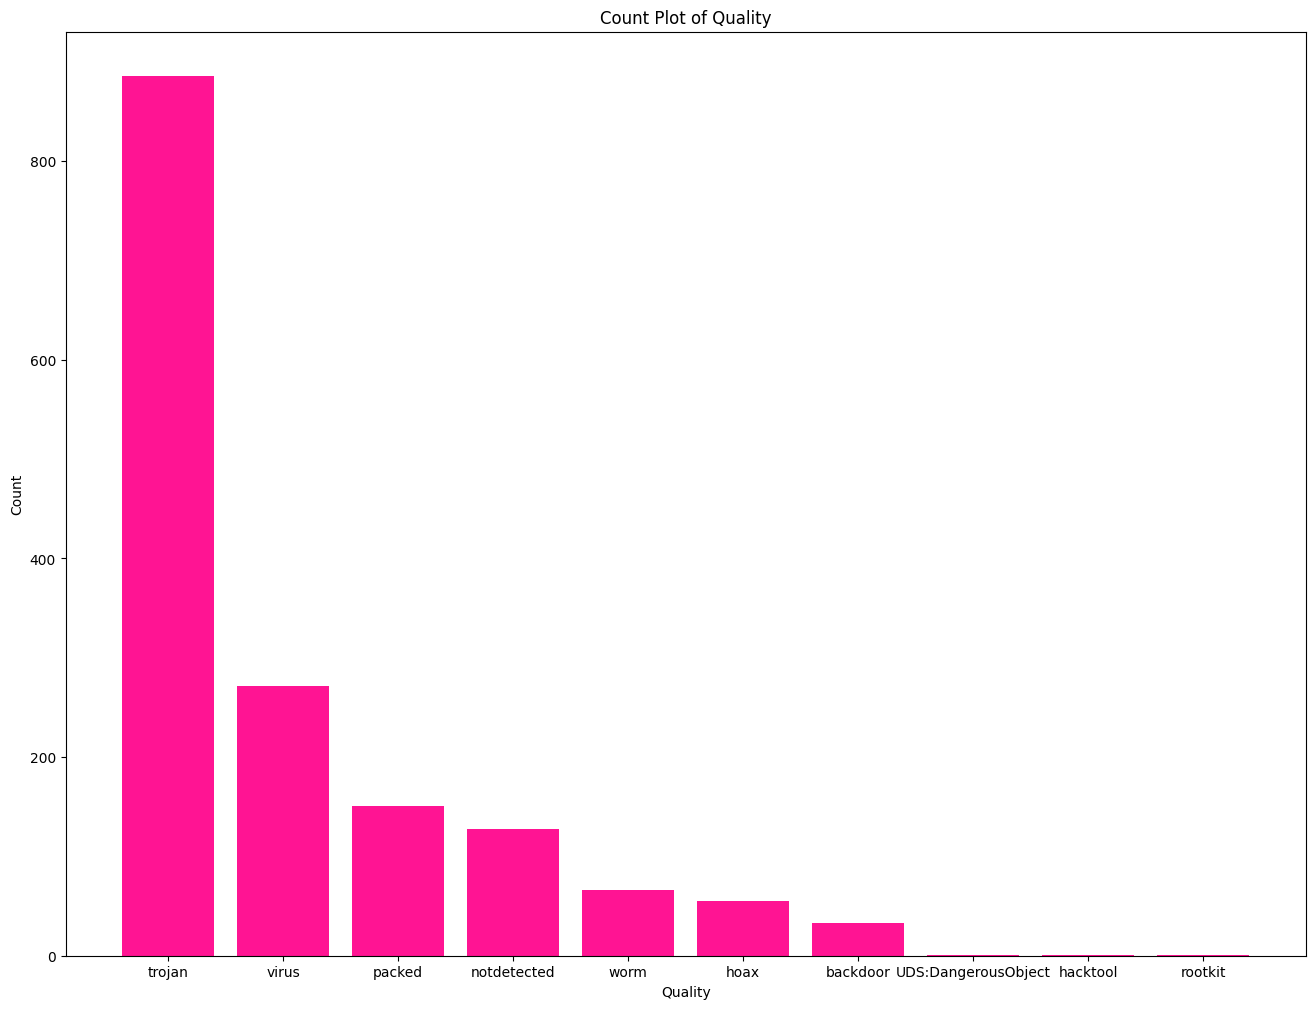

In [30]:
columns = df.columns.to_list()
quality_counts = df[columns[0]].value_counts()

plt.figure(figsize=(16, 12))
plt.bar(quality_counts.index, quality_counts, color='deeppink')
plt.title('Count Plot of Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

{'GetSystemDirectoryA': np.int64(287), 'GetVersionExW': np.int64(211), 'LocalAlloc': np.int64(157), 'VirtualAllocEx': np.int64(150), 'LoadLibraryExW': np.int64(107), 'GetProcessWindowStation': np.int64(81), 'lstrcpyW': np.int64(69), 'GetModuleHandleW': np.int64(59), 'GetCommandLineA': np.int64(46), 'GetCurrentProcessId': np.int64(30), 'DisableThreadLibraryCalls': np.int64(29), 'VirtualProtectEx': np.int64(28), 'RegisterClipboardFormatA': np.int64(24), 'GetVersion': np.int64(21), 'GetProcessVersion': np.int64(18), 'GetStockObject': np.int64(17), 'DosDateTimeToFileTime': np.int64(17), 'lstrcatW': np.int64(16), 'GetModuleFileNameW': np.int64(15), 'GetStartupInfoA': np.int64(15), 'FindResourceExW': np.int64(14), 'VirtualQueryEx': np.int64(14), 'CreateMutexW': np.int64(12), 'GetModuleHandleA': np.int64(11), 'GetProcAddress': np.int64(11), 'GlobalFindAtomW': np.int64(9), 'CreateEventW': np.int64(9), 'lstrlenA': np.int64(9), 'GetSystemTimeAsFileTime': np.int64(9), 'GetSystemDirectoryW': np.in

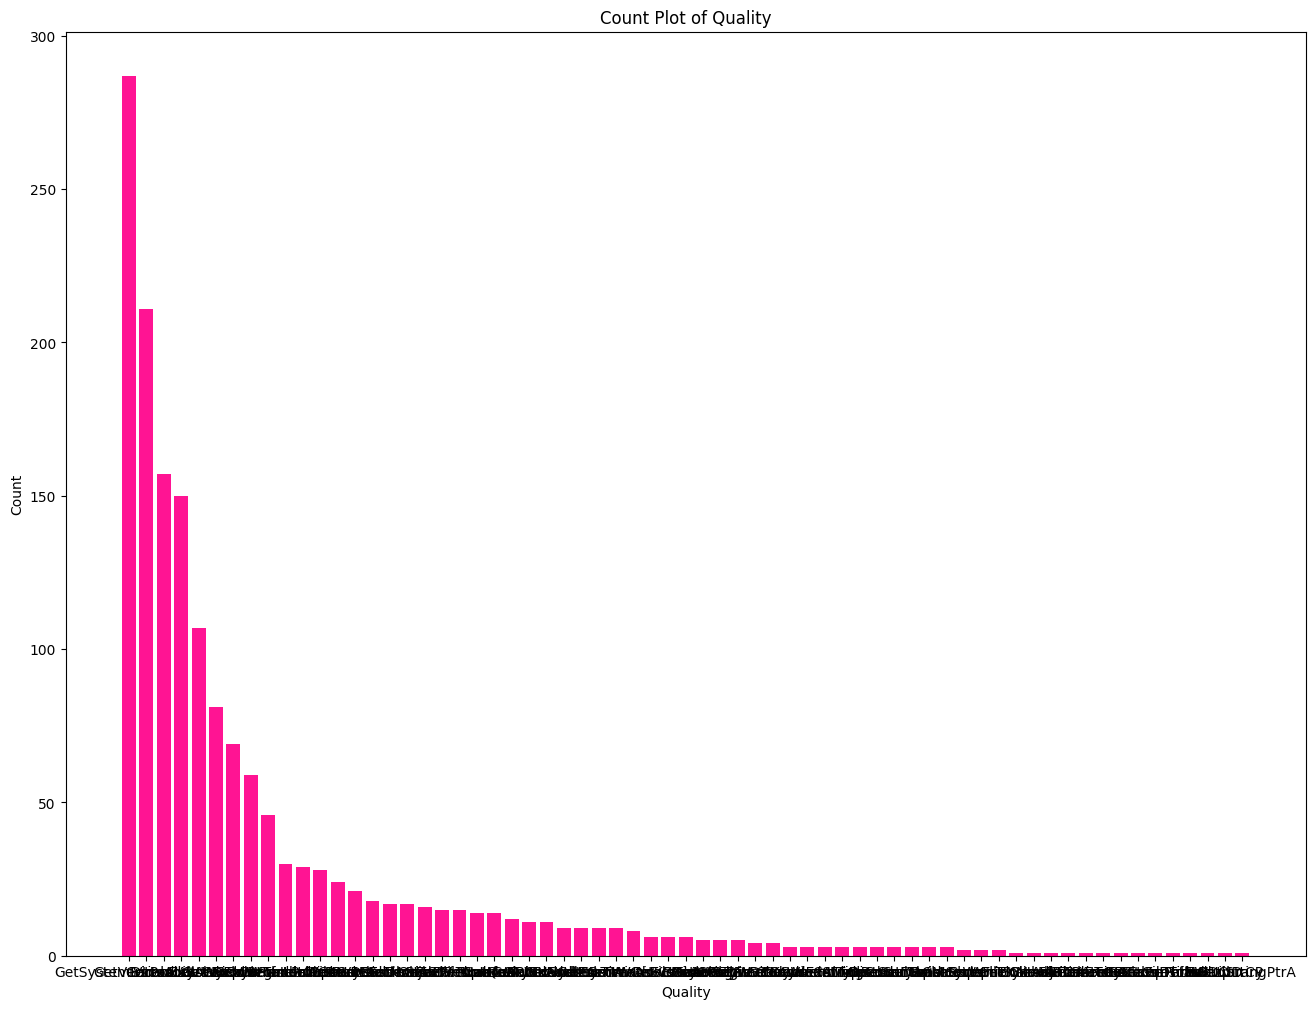

In [12]:

unique_values_call1 = {}
value_counts = df[columns[2]].value_counts()  # Store the Series separately

for name in value_counts.index:  # Iterate only over unique values
    unique_values_call1[name] = value_counts[name]

print(unique_values_call1)
plt.figure(figsize=(16, 12))
plt.bar(value_counts.index, value_counts, color='deeppink')
plt.title('Count Plot of Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

LoadLibraryExW              6159.0
LocalAlloc                  5336.0
GetProcAddress              3230.0
GetSystemMetrics            3159.0
CreateFileW                 2633.0
GetModuleHandleW            2424.0
LoadLibraryW                2412.0
GetThreadLocale             2221.0
MapViewOfFileEx             2152.0
GetModuleFileNameA          1970.0
RegisterClipboardFormatW    1764.0
GetModuleHandleA            1750.0
GetVersionExW               1624.0
CreateFileMappingW          1611.0
SystemParametersInfoW       1590.0
LoadCursorW                 1588.0
CloseHandle                 1551.0
GetSysColor                 1545.0
lstrlenA                    1519.0
RegisterClassW              1503.0
dtype: float64
[6159. 5336. 3230. 3159. 2633. 2424. 2412. 2221. 2152. 1970. 1764. 1750.
 1624. 1611. 1590. 1588. 1551. 1545. 1519. 1503.]


/var/folders/g3/862qhf7101n47zwcvz2r7f6m0000gn/T/ipykernel_83602/1478009767.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=api_counts.head(20).index, y=api_counts.head(20).values, palette='Blues_r')


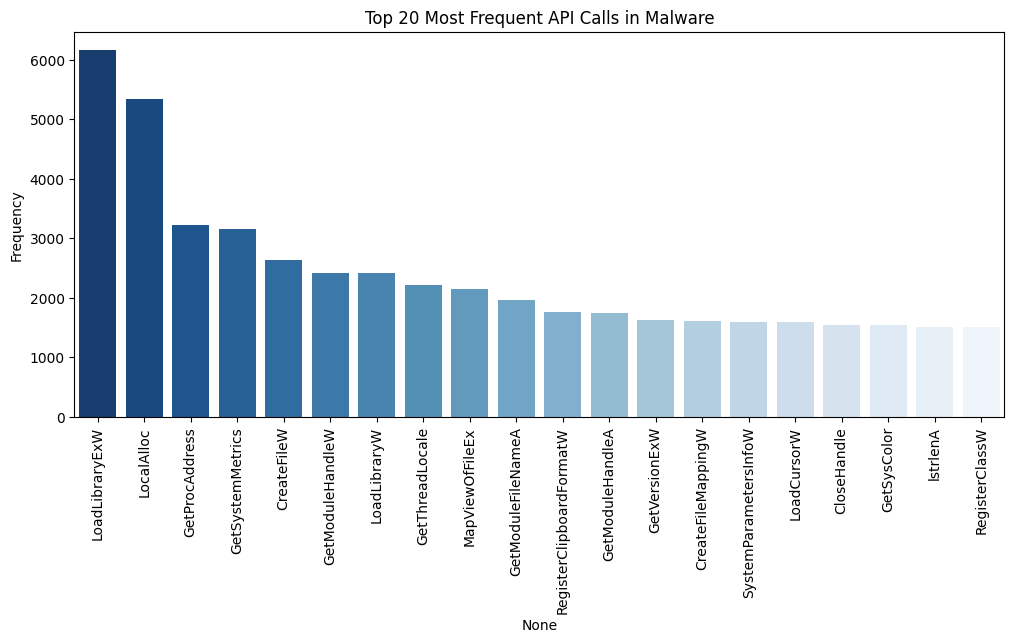

In [13]:
api_columns = df.columns[2:] 
api_counts = df[api_columns].apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False)
print(api_counts.head(20))
print(api_counts.head(20).values)
plt.figure(figsize=(12, 5))
sns.barplot(x=api_counts.head(20).index, y=api_counts.head(20).values, palette='Blues_r')
plt.title("Top 20 Most Frequent API Calls in Malware")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.show()


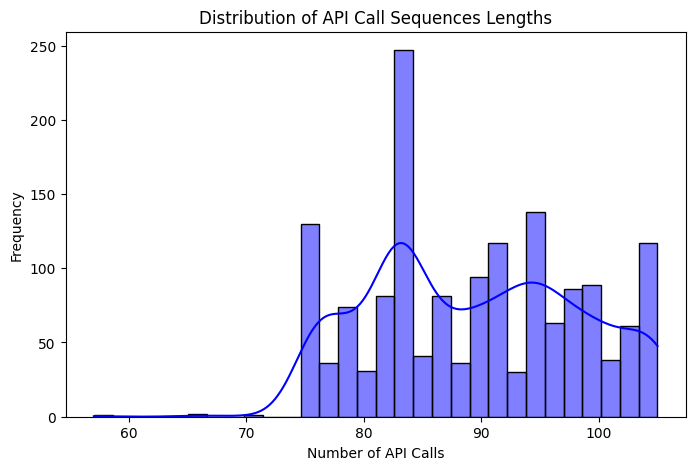

In [14]:
df['api_call_count'] = df.iloc[:, 2:].notnull().sum(axis=1)
plt.figure(figsize=(8, 5))
sns.histplot(df['api_call_count'], bins=30, kde=True, color='blue')
plt.title("Distribution of API Call Sequences Lengths")
plt.xlabel("Number of API Calls")
plt.ylabel("Frequency")
plt.show()


/var/folders/g3/862qhf7101n47zwcvz2r7f6m0000gn/T/ipykernel_83602/3356683582.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=api_usage.index, y=api_usage.values, palette='coolwarm')


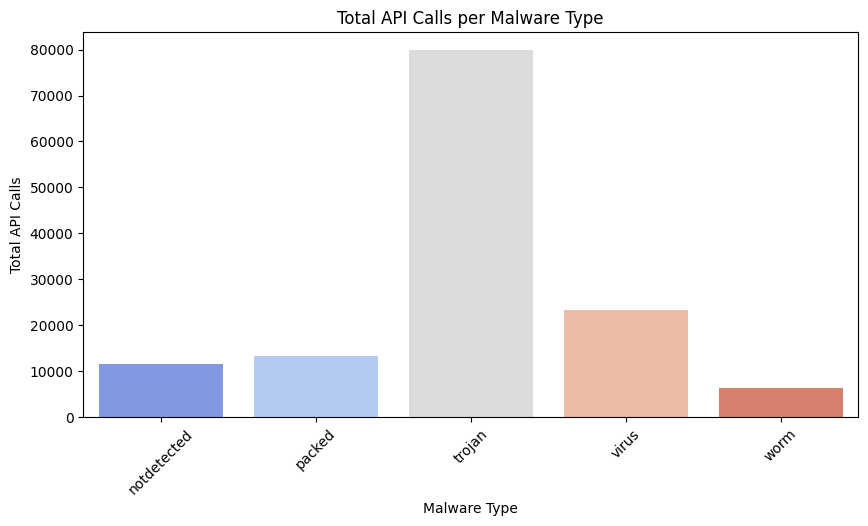

In [15]:
top_classes = df.iloc[:, 0].value_counts().index[:5]  # Select top 5 malware types
df_top_classes = df[df.iloc[:, 0].isin(top_classes)]

# Aggregate API calls per malware class
api_usage = df_top_classes.groupby(df_top_classes.iloc[:, 0])[api_columns].apply(lambda x: x.notnull().sum().sum())

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=api_usage.index, y=api_usage.values, palette='coolwarm')
plt.title("Total API Calls per Malware Type")
plt.ylabel("Total API Calls")
plt.xlabel("Malware Type")
plt.xticks(rotation=45)
plt.show()


In [16]:
df

,class,sha256,api_seq_call_2,api_seq_call_3,api_seq_call_4,api_seq_call_5,api_seq_call_6,api_seq_call_7,api_seq_call_8,api_seq_call_9,...,api_seq_call_98,api_seq_call_99,api_seq_call_100,api_seq_call_101,api_seq_call_102,api_seq_call_103,api_seq_call_104,api_seq_call_105,api_seq_call_106,api_call_count
0,worm,009a83236c600fd7ac034973f064284cec62f86631fe96...,GetSystemDirectoryA,IsDBCSLeadByte,LocalAlloc,CreateSemaphoreW,CreateSemaphoreA,GlobalAddAtomW,lstrcpynW,LoadLibraryExW,...,DuplicateHandle,DeviceIoControl,SwitchToThread,WSACleanup,FreeLibrary,VirtualQueryEx,ResetEvent,VirtualFreeEx,UnregisterClassW,105
1,worm,191828200aa2bd78f3548fb6a47407b05905efee6e83e0...,GetSystemDirectoryA,IsDBCSLeadByte,LocalAlloc,CreateSemaphoreW,CreateSemaphoreA,GlobalAddAtomW,lstrcpynW,LoadLibraryExW,...,DuplicateHandle,DeviceIoControl,SwitchToThread,WSACleanup,FreeLibrary,VirtualQueryEx,ResetEvent,VirtualFreeEx,UnregisterClassW,105
2,worm,1a1937fe8a401ca27be4514acc4f811442d8201abbad2a...,GetSystemDirectoryA,IsDBCSLeadByte,LocalAlloc,CreateSemaphoreW,CreateSemaphoreA,GlobalAddAtomW,lstrcpynW,LoadLibraryExW,...,DuplicateHandle,DeviceIoControl,SwitchToThread,WSACleanup,FreeLibrary,VirtualQueryEx,ResetEvent,VirtualFreeEx,UnregisterClassW,105
3,worm,21bbf357ac6d8347c68ec65fb8283a5f1185f699186959...,GetSystemDirectoryA,IsDBCSLeadByte,LocalAlloc,CreateSemaphoreW,CreateSemaphoreA,GlobalAddAtomW,lstrcpynW,LoadLibraryExW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89
4,worm,39563933eebcb3b09b189000e1bda255b39739792fc136...,GetSystemDirectoryA,IsDBCSLeadByte,LocalAlloc,CreateSemaphoreW,CreateSemaphoreA,GlobalAddAtomW,lstrcpynW,LoadLibraryExW,...,DuplicateHandle,DeviceIoControl,SwitchToThread,WSACleanup,FreeLibrary,VirtualQueryEx,ResetEvent,VirtualFreeEx,UnregisterClassW,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,trojan,1fa088e4bfce3a269cd69fad5dc632fa977e6741a73f04...,GlobalFindAtomW,GetModuleHandleW,DisableThreadLibraryCalls,GetVersionExW,GetVersionExA,GetModuleHandleA,GetProcAddress,CoTaskMemAlloc,...,GetWindowThreadProcessId,GetCurrentProcessId,LocalFree,CloseHandle,CoTaskMemFree,NaN,NaN,NaN,NaN,101
1590,worm,1fad69fad4aac201134b9600e1596d327097c38046e2ff...,GetSystemDirectoryA,GetVersionExW,IsDBCSLeadByte,CompareStringW,DisableThreadLibraryCalls,CreateEventW,lstrcpyW,GetThreadLocale,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89
1591,virus,1fb2ce95769c2372560f34b00398f3681949f494bfdf1c...,DisableThreadLibraryCalls,GetVersionExW,GetVersionExA,GetModuleHandleW,GetModuleHandleA,GetProcAddress,LocalAlloc,lstrlenW,...,GetModuleFileNameW,WriteFile,UnregisterClassW,GetModuleHandleW,GetProcAddress,GetWindowThreadProcessId,GetCurrentProcessId,LocalFree,CloseHandle,105
1592,trojan,1fb8e85deb472dadf965916020ac9ccec0104d882eb332...,VirtualAllocEx,GetStartupInfoA,GetStdHandle,GetFileType,LockResource,GetCommandLineA,GetEnvironmentStringsW,FreeEnvironmentStringsW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92


In [20]:
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager


api_columns = df.columns[2:]  # API call columns
unique_apis = set()

for col in api_columns:
    unique_apis.update(df[col].dropna().astype(str).unique())

# Setup Selenium WebDriver
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Run without opening browser (optional)
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")

service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# Microsoft API search base URL
base_url = "https://learn.microsoft.com/en-us/search/?terms="

api_dict = {}
for i,api in enumerate(unique_apis):
    search_url = base_url + api.replace(" ", "%20")
    
    # Open search page
    print(i,search_url)
    driver.get(search_url)
    time.sleep(2)  # Allow page to load
    try:
        # Extract first search result description
        first_result = p_elements = driver.find_elements(By.TAG_NAME, "p")
        text_ele = []
        for i in first_result:
            text_ele.append(i.text)
        api_dict[api] = text_ele
    except Exception:
        api_dict[api] = "Failed to fetch"

# Close WebDriver
driver.quit()

# Print API descriptions
print("\nAPI Dictionary:")
for api, desc in api_dict.items():
    print(f"{api}: {desc}")

import pickle

f = open("file.pkl","wb")
pickle.dump(api_dict,f)
f.close()


0 https://learn.microsoft.com/en-us/search/?terms=GetCurrentObject
1 https://learn.microsoft.com/en-us/search/?terms=ExitThread
2 https://learn.microsoft.com/en-us/search/?terms=IsMenu
3 https://learn.microsoft.com/en-us/search/?terms=WSALookupServiceBeginA
4 https://learn.microsoft.com/en-us/search/?terms=DebugActiveProcess
5 https://learn.microsoft.com/en-us/search/?terms=LPtoDP
6 https://learn.microsoft.com/en-us/search/?terms=SetEvent
7 https://learn.microsoft.com/en-us/search/?terms=GetDialogBaseUnits
8 https://learn.microsoft.com/en-us/search/?terms=CreateFontIndirectA
9 https://learn.microsoft.com/en-us/search/?terms=LoadStringA
10 https://learn.microsoft.com/en-us/search/?terms=GetConsoleCP
11 https://learn.microsoft.com/en-us/search/?terms=FindResourceA
12 https://learn.microsoft.com/en-us/search/?terms=GetWindowTextLengthA
13 https://learn.microsoft.com/en-us/search/?terms=_llseek
14 https://learn.microsoft.com/en-us/search/?terms=SetProcessWorkingSetSize
15 https://learn.mic

In [18]:
import pickle
